In [2]:
#!python
from numpy import *
from numpy.random import *

In [313]:
def resample(weights):
  n = len(weights)
  indices = []
  C = [0.] + [sum(weights[:i+1]) for i in range(n)]
  u0, j = random(), 0
  for u in [(u0+i)/n for i in range(n)]:
    while u > C[j]:
      j+=1
    indices.append(j-1)
  return indices


def particlefilter(sequence, pos, stepsize, n):
  seq = iter(sequence)
  x = ones((n, 2), int) * pos                   # Initial position
  f0 = next(seq)[tuple(pos)] * ones(n)         # Target colour model
  yield pos, x, ones(n)/n                       # Return expected position, particles and weights
  for im in seq:
    np.add(x, uniform(-stepsize, stepsize, x.shape), out=x, casting="unsafe")  # Particle motion model: uniform step
    x  = x.clip(zeros(2), array(im.shape)-1).astype(int) # Clip out-of-bounds particles
    f  = im[tuple(x.T)]                         # Measure particle colours
    w  = 1./(1. + (f0-f)**2)                    # Weight~ inverse quadratic colour distance
    w /= sum(w)                                 # Normalize w
    yield sum(x.T*w, axis=1), x, w              # Return expected position, particles and weights
    if 1./sum(w**2) < n/2.:                     # If particle cloud degenerate:
      x  = x[resample(w),:]                     # Resample particles according to weights

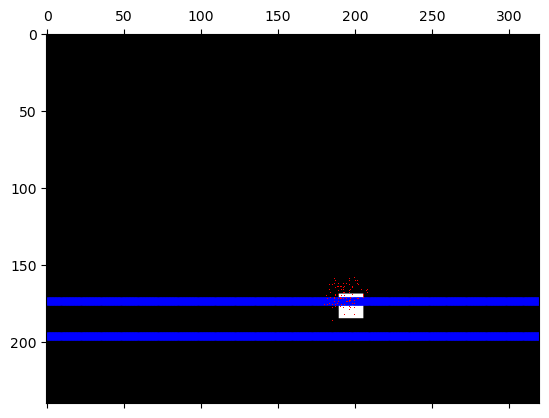

None

In [314]:

from pylab import *
from itertools import *
import time
from IPython import display

ion()
seq = [ im for im in zeros((20,240,320), int)]      # Create an image sequence of 20 frames long
x0 = array([120, 160])                              # Add a square with starting position x0 moving along trajectory xs
xs = vstack((arange(20)*3, arange(20)*2)).T + x0
for t, x in enumerate(xs):
    xslice = slice(x[0]-8, x[0]+8)
    yslice = slice(x[1]-8, x[1]+8)
    seq[t][xslice, yslice] = 255

for im, p in zip(seq, particlefilter(seq, x0, 8, 100)): # Track the square through the sequence
    pos, xs, ws = p
    position_overlay = zeros_like(im)
    position_overlay[np.array(pos).astype(int)] = 1
    particle_overlay = zeros_like(im)
    particle_overlay[tuple(xs.T)] = 1
    draw()
    time.sleep(0.3)
    clf()                                           # Causes flickering, but without the spy plots aren't overwritten
    imshow(im,cmap=cm.gray)                         # Plot the image
    spy(position_overlay, marker='.', color='b')    # Plot the expected position
    spy(particle_overlay, marker=',', color='r')    # Plot the particles
    display.clear_output(wait=True)
    display.display(show())

In [461]:
# ([ 0.12761523, -1.00813085,  2.23971262])

x, y, z =  -4.28862805e-03, -7.08433245e-04, -2.82868307e+00

(x**2 + 2*y + 2 - 2)**2 + (2*y + z**2 -3 - 5)**2, losses[-1]

(1.95669370549001e-06, 1.956694622297572e-06)

In [455]:
def summations(x, y, z):
    xx, yy = x**2 + 2*y + 2, y*2 + z**2 - 3
    return xx, yy

def loss(x, y, z, ta=2, tb=5):
    a, b = summations(x, y, z)
    y = (a-ta)**2 + (b-tb)**2
    return y

def softmax(arr):
    arr = -arr
    arr = np.array([np.exp(arr[i])/np.exp(arr).sum() for i in range(arr.shape[0])])
    return arr

def sigmoid(arr):
    # arr = -arr
    # print(arr)
    arr = np.array([1/(1 + np.exp(arr[i])) for i in range(arr.shape[0])], dtype=np.float64)
    return arr

In [456]:
samples = 10*(np.random.rand(1000, 3) - 0.5)
losses = []
means = []
# print(np.mean(samples, axis=0))
for i in range(10000):
    weights = np.sqrt(np.array([loss(w[0], w[1], w[2]) for w in samples])**2)
    # print(weights)
    # weights = sigmoid(weights)
    # print(weights)
    weights = 1/weights
    weights /= weights.sum()
    post = np.array([weights[i]*samples[i, :] for i in range(samples.shape[0])])
    # print(post)
    new_mean = np.sum(post, axis=0)
    samples = np.random.multivariate_normal(new_mean, np.diag([1/((i+1)), 1/(((i+1))), 1/(((i+1)))]), size=1000)
    losses.append(loss(new_mean[0], new_mean[1], new_mean[2]))
    means.append(new_mean)
    # print(new_mean)

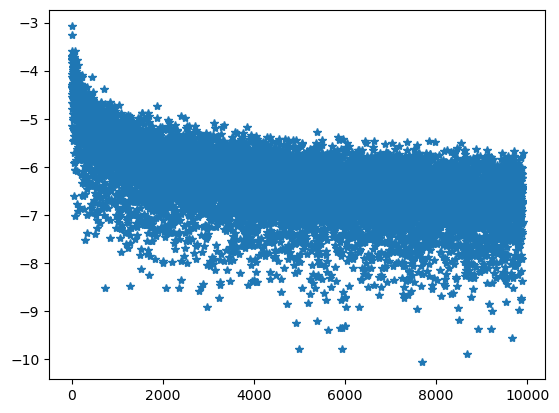

In [462]:
plt.plot(np.log10(np.array(losses))[100:], '*')

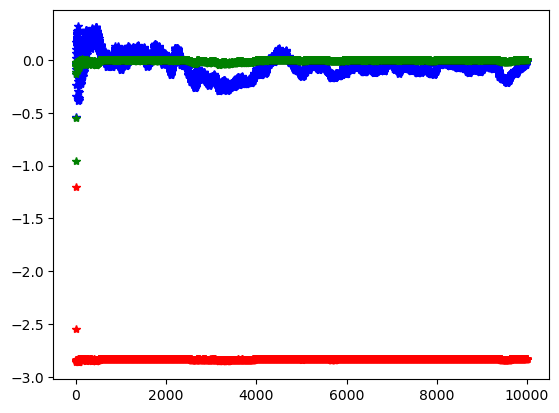

In [458]:
plt.plot(np.array(means)[:, 0], 'b*')
plt.plot(np.array(means)[:, 1], 'g*')
plt.plot(np.array(means)[:, 2], 'r*')

In [460]:
np.array(means)[-1]

array([-4.28862805e-03, -7.08433245e-04, -2.82868307e+00])

In [407]:
def loss(x):
    y = (x+5)**2
    return y

def softmax(arr):
    arr = -arr
    arr = np.array([np.exp(arr[i])/np.exp(arr).sum() for i in range(arr.shape[0])])
    return arr

In [271]:
samples = 10*(np.random.rand(500)-0.5)
losses = []
means = []
for i in range(10):
    weights = np.array([loss(w) for w in samples])
    # weights /= weights.sum()  
    # weights = np.abs(1 - weights)
    # weights /= weights.sum()  
    weights = softmax(weights)
    # print(samples, weights)
    post = np.array([weights[i]*samples[i] for i in range(samples.shape[0])])
    new_mean = post.sum()
    samples = np.random.normal(new_mean, 10/((i+1)), 500)
    losses.append(loss(new_mean))
    means.append(new_mean)

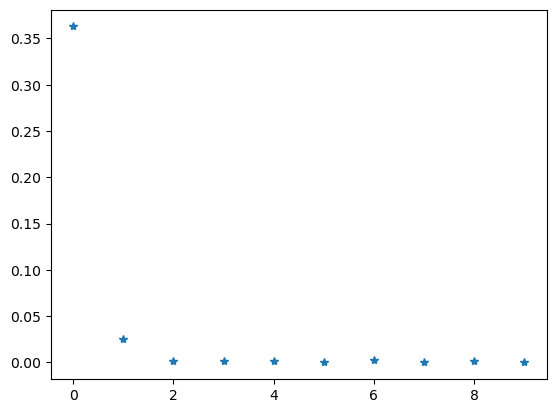

In [272]:
plt.plot(losses, '*')

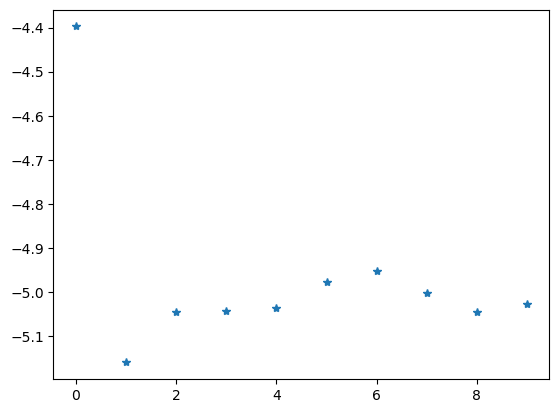

In [273]:
plt.plot(means, "*")

In [216]:
10*(np.random.rand(10)-0.5)

array([ 4.1294852 ,  1.14828553, -2.75904726,  2.32389336,  4.17194863,
       -3.54185979,  2.19517108, -0.24350277, -0.58812903,  1.79650937])